# Supplementary Information for: <a class="tocSkip">

# Sensitivity of the thermal niche of arthropods to physiological mismatches between life stages <a class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Model-for-temperature-dependent-fitness-of-disease-vectors" data-toc-modified-id="Model-for-temperature-dependent-fitness-of-disease-vectors-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Model for temperature-dependent fitness of disease vectors</a></span></li><li><span><a href="#Temperature-dependence-of-life-history-parameters" data-toc-modified-id="Temperature-dependence-of-life-history-parameters-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Temperature-dependence of life history parameters</a></span><ul class="toc-item"><li><span><a href="#Thermal-Performance-Curve-(TPC)-parameterizations-of-life-history-traits" data-toc-modified-id="Thermal-Performance-Curve-(TPC)-parameterizations-of-life-history-traits-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Thermal Performance Curve (TPC) parameterizations of life history traits</a></span></li></ul></li><li><span><a href="#Temperature-Dependence-of-$r_m$" data-toc-modified-id="Temperature-Dependence-of-$r_m$-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Temperature Dependence of $r_m$</a></span></li><li><span><a href="#The-sensitivity-of--thermal-optimum-and-thermal-niche-of-$r_{m}$" data-toc-modified-id="The-sensitivity-of--thermal-optimum-and-thermal-niche-of-$r_{m}$-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>The sensitivity of  thermal optimum and thermal niche of $r_{m}$</a></span></li><li><span><a href="#The-temperature-dependent-trait-sensitivity-analysis" data-toc-modified-id="The-temperature-dependent-trait-sensitivity-analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>The temperature-dependent trait sensitivity analysis</a></span></li><li><span><a href="#The-sensitivity-of-the-model-to-the-parametrisation-of-loss-of-fecundity-($\kappa$)" data-toc-modified-id="The-sensitivity-of-the-model-to-the-parametrisation-of-loss-of-fecundity-($\kappa$)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>The sensitivity of the model to the parametrisation of loss of fecundity ($\kappa$)</a></span></li></ul></div>

In [54]:
#Load some modules etc
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from sympy import *
import scipy as sc
import numpy as np
init_printing()

# Model for temperature-dependent fitness of disease vectors

In age-structured populations, the expected reproductive success of an individual can be described using the continuous form of the Euler-Lotka equation:
$$
	\int\limits_{\alpha}^\infty \mathrm{e}^{-r_m x}l_{x}b_{x}\, \mathrm{d}x = 1
$$
where $r_m$ is the population growth rate, $a$ is the age of first reproduction, $l_x$ is the age-specific survivorship, and $b_x$ is the age-specific fecundity. Solving this equation gives the population growth rate, $r_m$ as a function of life-history parameters/traits.

In [34]:
x, l_a, b_pk, alpha, z, z_J, kappa, T, M_0, K, t = var('x l_a b_pk alpha z z_J kappa T M_0 K t',real=True, positive = true) #assign symbolic variables

r_m  = var('r_m', real = True) # r_m can be negative

As arthropods, including disease vectors, are expected to have a Type III survivorship curve, given an instantaneous mortality rate, $z$, age-specific survivorship, $l_{x}$, declines exponentially with age and can be modeled as:

\begin{equation} 
	l_{x} = l_{\alpha}\mathrm{e}^{-z(x-\alpha)}
\end{equation}

Here, $l_{\alpha}$ is the proportion of eggs surviving to adulthood (age $\alpha$), which, assuming a fixed instantaneous mortality rate across all juvenile stage, $z_J$, can be modelled as:
\begin{equation}
	l_{\alpha} = \mathrm{e}^{-\int\limits_0^\alpha z_J\, \mathrm{d}x} = 
	\mathrm{e}^{-z_J \alpha}
\end{equation}

In [35]:
l_a = exp(-integrate(z_J,(x,0,alpha))); l_a

This, when substituted into the $l_x$ equation then gives

\begin{equation}
	l_x = \mathrm{e}^{-(z_J \alpha + z(x-\alpha))}
\end{equation}

The figure below show the shape of the $l_x$ model. This model can be easily adapted for a variable mortality rate, for example due to senescence, often modelled using a gompertz-type equation.

In [36]:
l_x = l_a * exp(-z*(x - alpha)); simplify(l_x)

(where $x \ge \alpha $).

Next, age-specific fecundity $b_x$ is expected to reach a peak, $b_{pk}$, shortly after maturation and then decline gradually with age. We model this using an exponential function
$$
	b_{x} = b_{pk} \mathrm{e}^{\kappa \left(\alpha - x\right)}
$$

where we assume that fecundity peaks at the age of first reproduction, which occurs immediately at the time of adult emergence ($\alpha$), and $\kappa$ is a shape parameter (units of day$^{-1}$; can be interpreted as fecundity loss rate) that controls the spread of the fecundity schedule, that is, the rate of decline in fecundity after its peak. It is also possible that there is a systematic temperature-dependence of the delay between $\alpha$ and the age of peak fecundity. This can be modelled using a shifted exponential or gompertz equation, but is outside the scope of the current study. The figures below show the shape of the $b_x$ model.

In [37]:
b_x = b_pk * exp(-kappa*(x - alpha)); simplify(b_x)
# alternatives with delay (v) included: 
# bx = b_pk * exp((kappa-1)*(x-v-a)/-v) * (x-a)**(kappa-1) * v**(1-kappa) # rescaled gamma (Note that kappa > 1, always!)
# bx = b_pk * exp(-kappa*(x-v-a)); simplify(bx) # with delay till peak fecundity v
# also the shifted gompertz

These terms can therefore be plotted as such:

In [38]:
# Now plot the functions (Figures for this SI appendix):
#assign parameter values

z_J_par = .05 #1/day
z_par = .03 #1/day
alp_par = 25. #days
b_pk_par = 10. #individuals/(individual * day)
kap_par = .1 #1/day

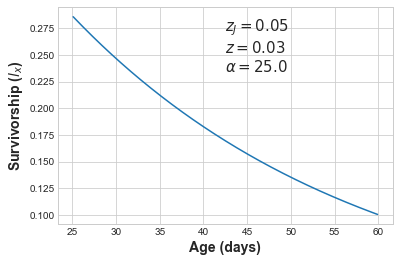

In [56]:
#Numerically evaluate
x_vec = np.arange(0, 60, 0.1) #vector of ages

#l_x_vec = np.array([l_x.evalf(subs = {z_J:z_J_par, x:age, alpha:alp_par, z:z_par}) for age in x_vec])

# or use lambidfy to speed up:
l_x_lam = lambdify((z_J, z, alpha,x), l_x, np)
l_x_vec = l_x_lam(z_J_par, z_par, alp_par, x_vec[x_vec>alp_par])

fig = plt.figure(); ax = fig.add_subplot(111)
ax.plot(x_vec[x_vec>alp_par], l_x_vec)
ax.set_xlabel('Age (days)', fontsize=14, fontweight = 'bold')
ax.set_ylabel('Survivorship ($l_x$)', fontsize=14, fontweight = 'bold')
ax.text(sc.mean(x_vec[x_vec>alp_par]), sc.amax(l_x_vec), 
        '$z_J = ' + str(z_J_par)+'$ \n' + 
        '$z = ' + str(z_par)+'$ \n' + 
        r'$\alpha = ' + str(alp_par)+'$ \n',
        horizontalalignment='left', verticalalignment='top', fontsize=15)
plt.savefig('../results/lxModel.pdf')

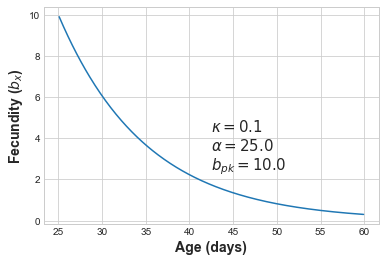

In [60]:
fig = plt.figure(); ax = fig.add_subplot(111)
#b_x_vec = np.array([b_x.evalf(subs = {b_pk:b_pk_par, x:age, alpha:alp_par, kappa:kap_par}) for age in x_vec])#use lambidy to speed up
b_x_lam = lambdify((b_pk, kappa, alpha, x), b_x, np)
b_x_vec = b_x_lam(b_pk_par, kap_par, alp_par, x_vec[x_vec>alp_par])

ax.plot(x_vec[x_vec>alp_par], b_x_vec);
ax.set_xlabel('Age (days)', fontsize=14, fontweight = 'bold'); 
ax.set_ylabel('Fecundity ($b_x$)', fontsize=14, fontweight = 'bold')
ax.text(sc.mean(x_vec[x_vec>alp_par]), sc.amax(b_x_vec)/2, 
        r'$\kappa = ' + str(kap_par)+'$ \n'+ 
        r'$\alpha = ' + str(alp_par)+'$ \n' +
        r'$b_{pk} = ' + str(b_pk_par)+'$ \n',
        horizontalalignment='left', verticalalignment='top', fontsize=15)
plt.savefig('../results/bxModel.pdf')

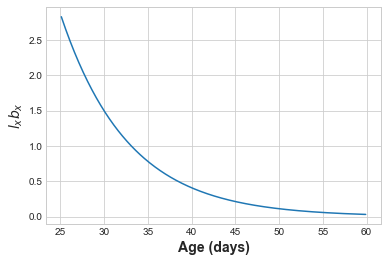

In [61]:
fig = plt.figure(); ax = fig.add_subplot(111) #now plot lxmx

ax.plot(x_vec[x_vec>alp_par], b_x_vec*l_x_vec);
ax.set_xlabel('Age (days)', fontsize=14, fontweight = 'bold'); 
ax.set_ylabel('$l_x b_x$', fontsize=14, fontweight = 'bold')
plt.savefig('../results/lxbxModel.pdf')

Substituting the $l_x$ and $b_x$ models into the Euler-Lotka Equation, we get

$$	
\int\limits_{\alpha}^\infty b_{pk} \mathrm{e}^{- \alpha z_{J} + \kappa \left(\alpha - x\right) - r x + z \left(\alpha - x\right)}\, \mathrm{d}x = 1
$$

i.e., 
$$
b_{pk}\mathrm{e}^{- \alpha z_J} 
\int\limits_{\alpha}^\infty \mathrm{e}^{- r x + (\kappa + z) (\alpha - x)}\, \mathrm{d}x = 1
$$

In [42]:
EuLo = exp(-r_m * x) * l_x * b_x; simplify(EuLo)

And evaluating the integral produces after simplification:

\begin{equation}
\frac{b_{pk} e^{- \alpha \left(r + z_{J}\right)}}{\kappa + r + z} = 1
\end{equation}

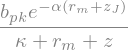

In [43]:
# Integrate EuLo (sagemath used to integrate(EuLo, x, alpha, infinity), with positivity constraints on all parameters), which gives:
EuLo_int = b_pk*exp(-alpha*z_J)/((kappa + r_m)*exp(alpha*r_m) + z*exp(alpha*r_m)); simplify(EuLo_int)

Solving this for $r_m$ gives:

\begin{equation}
r_m = \frac{1}{\alpha} \left(- \alpha \left(\kappa + z\right) + \operatorname{LambertW}{\left (\alpha b_{pk} e^{\alpha \left(\kappa + z - z_{J}\right)} \right )}\right)
\end{equation}

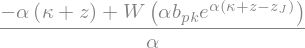

In [44]:
r_SP = solve(EuLo_int-1,r_m); r_SP = simplify(r_SP[0]);r_SP

The LambertW function part is difficult to use for sensitivity analyses (and also hard to interpret) so, instead, we approximate this by taking log of the solution to the integral above and perform a power series expansion around $r_m = 0$ of just the term $\mathrm{ln}(\kappa + r + z)$: 

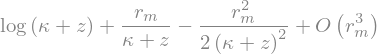

In [45]:
series(ln(r_m + kappa + z),r_m, 0,3)

That is, 

$$
 \frac{b_{pk} e^{- \alpha z_{J}}}{z e^{\alpha r_{m}} + \left(\kappa + r_{m}\right) e^{\alpha r_{m}}}
 \approx \log{\left (\kappa + z \right )} + \frac{r_{m}}{\kappa + z} - \frac{r_{m}^{2}}{2 \kappa^{2} + 4 \kappa z + 2 z^{2}} + \mathcal{O}\left(r_{m}^{3}\right)
$$

Then, substituting the first two terms back into the integral solution and solving for $r_m$ gives:

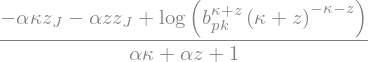

In [46]:
EuLo_int_app = b_pk*exp(-alpha*(r_m + z_J))/ exp(log(kappa + z) + r_m/(kappa + z))

r_SP_app = solve(EuLo_int_app-1, r_m); r_SP_app = simplify(r_SP_app[0]); r_SP_app

Thus the approximation is: 

$$
	r_m \approx \frac{-\alpha \kappa z_J - \alpha z z_J + \kappa \log{\left (\frac{b_{pk}}{\kappa + z} \right )} + z \log{\left (\frac{b_{pk}}{\kappa + z} \right )}}{\alpha (\kappa + z) + 1}  
$$

that is, 

$$r_m \approx \frac{(\kappa + z)  \left( \log\left(\frac{b_{pk}}{\kappa + z} \right) - \alpha z_J\right)}{\alpha (\kappa + z) + 1} $$

The figures below show that this approximation is very good as long as $r_m$ is relatively small (approx. $<0.5$). This range of $r_m$ values is typically where [most arthropod growth rates lie](https://www.journals.uchicago.edu/doi/full/10.1086/506977).

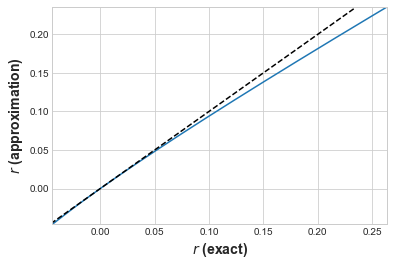

In [62]:
from scipy.special import lambertw # need this for the lambertw

bpk_vec = np.arange(.1, 1000, 0.1).astype(float) #vector of b_pk's

#r_SP_app_vec = np.array([r_SP_app.evalf(subs = {b_pk:b_pkVal,z_J:z_J_par, alpha:alp_par, z:z_par, kappa:kap_par}) for b_pkVal in bpk_vec])
#use lambidy to speed up:
r_SP_app_lam = lambdify((b_pk, z_J, z, kappa, alpha), r_SP_app, np)
r_SP_app_vec = r_SP_app_lam(bpk_vec, z_J_par, z_par, kap_par, alp_par)

# have to specify r_SP with lambertw:
# r_SP_vec = (-a*(kappa + z) + lambertw((a_par*bpk_vec*exp(a_par*(kap_par + z_par - z_J_par))).astype('float')).real)/a_par
tmp = lambertw((alp_par*bpk_vec*exp(alp_par*(kap_par + z_par - z_J_par))).astype('float')).real
r_SP_vec = -(kap_par + z_par) + tmp/alp_par

fig = plt.figure(); ax = fig.add_subplot(111)
ax.plot(r_SP_vec, r_SP_app_vec)
ax.plot(np.arange(-1,5,0.1), np.arange(-1,5,0.1), "k--")
ax.set_xlim([min(r_SP_vec),max(r_SP_vec)])
ax.set_ylim([min(r_SP_app_vec),max(r_SP_app_vec)])
ax.set_xlabel('$r$ (exact)', fontsize=14, fontweight = 'bold'); 
ax.set_ylabel('$r$ (approximation)', fontsize=14, fontweight = 'bold')
plt.savefig('../results/rapprox0.pdf')


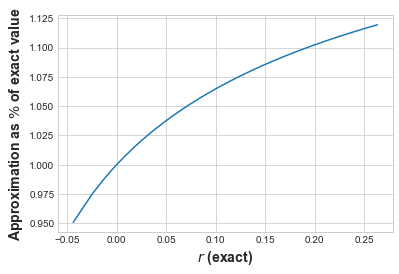

In [64]:
fig = plt.figure(); ax = fig.add_subplot(111)
ax.plot(r_SP_vec, r_SP_vec/r_SP_app_vec)
ax.set_xlabel('$r$ (exact)', fontsize=14, fontweight = 'bold'); 
ax.set_ylabel('Approximation as $\%$ of exact value', fontsize=14, fontweight = 'bold')
plt.savefig('../results/rapprox1.pdf')

The parameters underlying fitness and their units are summarized in the following table:


| **Parameter**| **Units** | **Description** |
|-------------|-----------|-----------------|
| $a$ | day | Age of maturation (Juvenile to adult development time)|
|$b_{pk}$ | individuals (eggs) $\times$ individual (female) $\times$ day $^{-1}$ , i.e., day$^{-1}$ | Peak reproductive rate|
|$z$ | day$^{-1}$ | Adult mortality rate |
|$z_J$ | day$^{-1}$ | Mortality rate across all juvenile stages |
|$\kappa$ | day$^{-1}$ | Fecundity loss rate (inverse of spread of the fecundity schedule)  |


# Temperature-dependence of life history parameters 

We described the thermal performance curve for each life history parameter using the Sharpe-Schoolfield model, or its inverse: 

In [49]:
# Assign functions
B_0, E, E_D, T_pk, k, T, T_ref = var('B_0 E E_D T_pk k T T_ref')

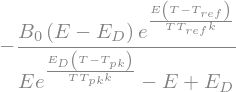

In [50]:
B = B_0 * exp(-E * ((1/(k*(T))) - (1/(k*T_ref)))) /(1 + (E / (E_D - E)) * exp((E_D / k)* ((1/T_pk) - (1/T)))); simplify(B)

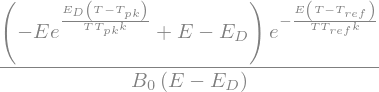

In [51]:
B_inv = simplify(1/B); B_inv

The Sharpe-Schoolfield model provides a mechanistic interpretation of the thermal performance curves of biological traits but could be replaced with alternative unimodal models, including statistical model such as Briere-type or polynomial models, without having a qualitative impact on the results.

In [52]:
# Assign generic parameter values
k_par = 8.617 * 10**-5
E_par = .55
E_D_par = 4
T_pk_par = 25.3
T_ref_par = 10+273.15
B_0_par = 0.5

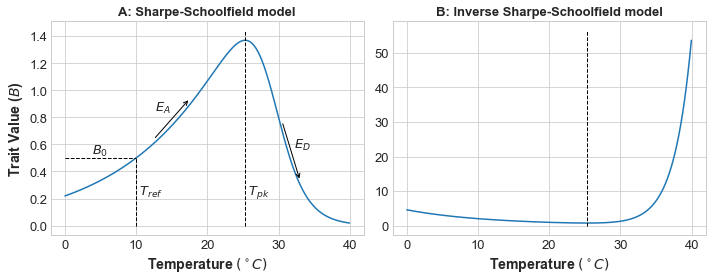

In [77]:
T_vec = 273.15+np.arange(0, 40, 0.05) #Vector of temperatures

B_lam = lambdify((B_0, E, T_pk, T_ref, E_D,k,T), B, np) 
B_vec = B_lam(B_0_par,E_par,T_pk_par+273.15,T_ref_par,E_D_par,k_par,T_vec)

B_inv_lam = lambdify((B_0, E, T_pk, T_ref, E_D,k,T), B_inv, np)
B_inv_vec = B_inv_lam(B_0_par,E_par,T_pk_par+273.15,T_ref_par,E_D_par,k_par,T_vec)

fig = plt.figure(figsize=(10, 4)); ax = fig.add_subplot(121)

ax.plot(T_vec-273.15, B_vec);

ax.annotate(s='', xy=(T_vec[250]-273.15,B_vec[250]*1.05), xytext=(T_vec[350]-273.15,B_vec[350]*1.05), arrowprops=dict(arrowstyle='<-'))
ax.text(T_vec[300]-273.15, B_vec[300]*1.1, ' $E_A$',  horizontalalignment='right', verticalalignment='bottom', fontsize=13)

ax.annotate(s='', xy=(T_vec[610]-273.15,B_vec[610]*1.1), xytext=(T_vec[660]-273.15,B_vec[660]*1.1), arrowprops=dict(arrowstyle='<-'))
ax.text(T_vec[635]-273.15, B_vec[635]*1.15, ' $E_D$',  horizontalalignment='left', verticalalignment='bottom', fontsize=13)

ax.plot([T_pk_par, T_pk_par], [0,ax.get_ylim()[1]], color='k', linestyle='--', linewidth=1)
ax.text(T_pk_par, B_0_par/2, ' $T_{pk}$',  horizontalalignment='left', verticalalignment='center', fontsize=13)

ax.plot([0,10], [B_0_par, B_0_par], color='k', linestyle='--', linewidth=1)
ax.plot([10, 10], [0,B_0_par], color='k', linestyle='--', linewidth=1)
ax.text(5, B_0_par, '$B_0$',  horizontalalignment='center', verticalalignment='bottom', fontsize=13)
ax.text(10, B_0_par/2, ' $T_{ref}$',  horizontalalignment='left', verticalalignment='center', fontsize=13)
ax.set_title('A: Sharpe-Schoolfield model', fontsize=13, fontweight = 'bold'); 
ax.set_xlabel('Temperature $(^\circ C)$', fontsize=14, fontweight = 'bold'); 
ax.set_ylabel('Trait Value ($B$)', fontsize=14, fontweight = 'bold')
ax.tick_params(axis='x', labelsize=13);
ax.tick_params(axis='y', labelsize=13);

#ax.text(sc.amin(T_vec-273.15)+2, sc.amax(B_vec), 
#        '$B_0 = ' + str(B_0_par)+'$ \n'+ 
#        '$E = ' + str(E_par)+'$ \n'+ 
#        '$T_{pk} = ' + str(T_pk_par)+'$ \n'+
#        '$E_D = ' + str(E_D_par)+'$ \n',
#        horizontalalignment='left', verticalalignment='top', fontsize=13)

ax = fig.add_subplot(122)
ax.plot(T_vec-273.15, B_inv_vec);
ax.plot([T_pk_par, T_pk_par], [0,ax.get_ylim()[1]], color='k', linestyle='--', linewidth=1)
ax.set_title('B: Inverse Sharpe-Schoolfield model', fontsize=13, fontweight = 'bold'); 
ax.set_xlabel('Temperature $(^\circ C)$', fontsize=14, fontweight = 'bold');
ax.tick_params(axis='x', labelsize=13);
ax.tick_params(axis='y', labelsize=13);
fig.tight_layout()

plt.savefig('../results/TPCModel.pdf')

## Thermal Performance Curve (TPC) parameterizations of life history traits

In order to evaluate the model, idealised thermal performance curves (TPCs) were generated. These TPCs were parametrised to have equal sensitivity to temperature by assigning all traits the same values for thermal optimum ($T_{pk}$), activation energy ($E$) and deactivation energy ($E_D$).

The thermal optimum and activation energy were parametrised as the median values found by Dell *et al.* (2011) in an analysis a database of thermal perfomance curves for different traits across a range of taxa. Due to the small number of studies from which it was possible to estimate the deactivation energy was parametrised included in Dell's *et al.* (2011) analysis, deactivation energy was parametrised from ... (BioTraits database...)

The normalisation constant ($B_0$) was parametrised for each trait in order that the trait value at the thermal optimum is of a scale consistent with empirical observations of these traits in disease vectors. For this, we used the thermal perfomance curves fitted by Mordecai $et al.$ (2003?, 2017?) for life history traits in mosquitoes. In the absence of appropriate data on the rate of loss of fertility ($\kappa$), we evaluate the model for a range of values.


|**Model parameter** | **Normalization constant ($B_0$)** | **Thermal optimum ($T_{pk}$)** | **Thermal Sensitivity ($E$)** | **$E_D$** |
|----------------------|----------------------|----------------------|----------------------|-----------------|
|$\alpha$ | 25 | 25.3 | 0.65 | 3 |
|$b_{pk}$ | 10 | 25.3 | 0.65 | 3 |
|$z$ | 0.03 | 25.3 | 0.65 | 3 |
|$z_J$ | 0.05 | 25.3 | 0.65 | 3 |
|$\kappa$ | 0-1 | 25.3 | 0.65 | 3 |

The resulting TPCs are plotted below.

In [78]:
#Assign trait-specific TPC values:

B_0_alp =  1/alp_par#days; inverse because we are using inverse of the Sharpe-Schoolfield model
T_pk_alp = 25.3
E_alp = .55
E_D_alp = 3

B_0_bpk = b_pk_par #individuals/(individual * day)
T_pk_bpk = 25.3
E_bpk = .55
E_D_bpk = 3

B_0_z = 1/z_par  #1/day; inverse because we are using inverse of the S-S TPC model
T_pk_z = 25.3
E_z = .55
E_D_z = 3

B_0_zJ = 1/z_J_par  #1/day; inverse because we are using inverse of the S-S TPC model
T_pk_zJ = 25.3
E_zJ = .55
E_D_zJ = 3

B_0_kap = kap_par #1/day
T_pk_kap = 25.3
E_kap = .55
E_D_kap = 3

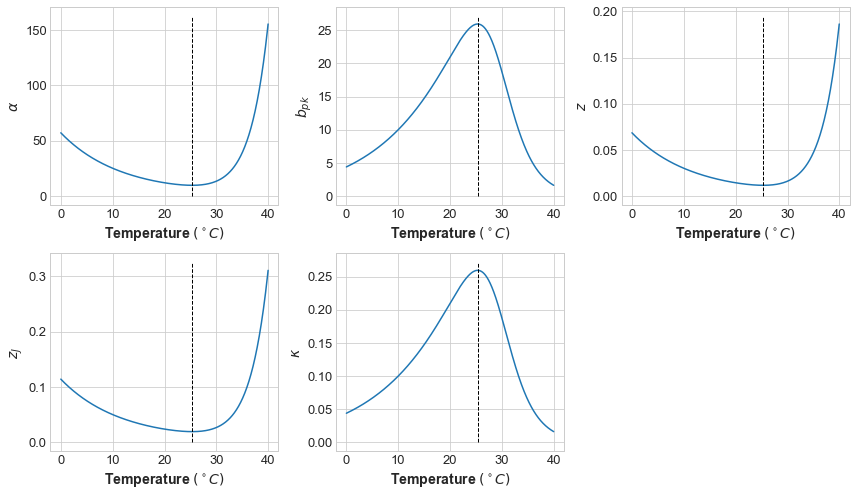

In [82]:
#Calculate the TPCs

alp_vec = B_inv_lam(B_0_alp,E_alp,T_pk_alp+273.15,T_ref_par,E_D_alp,k_par,T_vec)
bpk_vec = B_lam(B_0_bpk,E_bpk,T_pk_bpk+273.15,T_ref_par,E_D_bpk,k_par,T_vec)
z_vec = B_inv_lam(B_0_z,E_z,T_pk_z+273.15,T_ref_par,E_D_z,k_par,T_vec)
zJ_vec = B_inv_lam(B_0_zJ,E_zJ,T_pk_zJ+273.15,T_ref_par,E_D_zJ,k_par,T_vec)
kap_vec = B_lam(B_0_kap,E_kap,T_pk_kap+273.15,T_ref_par,E_D_kap,k_par,T_vec)

fig = plt.figure(figsize=(12, 7)); 

ax = fig.add_subplot(231)
ax.plot(T_vec-273.15, alp_vec);
ax.plot([T_pk_par, T_pk_par], [0,ax.get_ylim()[1]], color='k', linestyle='--', linewidth=1)
ax.set_xlabel('Temperature $(^\circ C)$', fontsize=14, fontweight = 'bold'); 
ax.set_ylabel(r'$\alpha$', fontsize=14, fontweight = 'bold')
ax.tick_params(axis='x', labelsize=13);
ax.tick_params(axis='y', labelsize=13);

ax = fig.add_subplot(232)
ax.plot(T_vec-273.15, bpk_vec);
ax.plot([T_pk_par, T_pk_par], [0,ax.get_ylim()[1]], color='k', linestyle='--', linewidth=1)
ax.set_xlabel('Temperature $(^\circ C)$', fontsize=14, fontweight = 'bold'); 
ax.set_ylabel('$b_{pk}$', fontsize=14, fontweight = 'bold')
ax.tick_params(axis='x', labelsize=13);
ax.tick_params(axis='y', labelsize=13);

ax = fig.add_subplot(233)
ax.plot(T_vec-273.15, z_vec);
ax.plot([T_pk_par, T_pk_par], [0,ax.get_ylim()[1]], color='k', linestyle='--', linewidth=1)
ax.set_xlabel('Temperature $(^\circ C)$', fontsize=14, fontweight = 'bold'); 
ax.set_ylabel('$z$', fontsize=14, fontweight = 'bold')
ax.tick_params(axis='x', labelsize=13);
ax.tick_params(axis='y', labelsize=13);

ax = fig.add_subplot(234)
ax.plot(T_vec-273.15, zJ_vec);
ax.plot([T_pk_par, T_pk_par], [0,ax.get_ylim()[1]], color='k', linestyle='--', linewidth=1)
ax.set_xlabel('Temperature $(^\circ C)$', fontsize=14, fontweight = 'bold'); 
ax.set_ylabel('$z_J$', fontsize=14, fontweight = 'bold')
ax.tick_params(axis='x', labelsize=13);
ax.tick_params(axis='y', labelsize=13);

ax = fig.add_subplot(235)
ax.plot(T_vec-273.15, kap_vec);
ax.plot([T_pk_par, T_pk_par], [0,ax.get_ylim()[1]], color='k', linestyle='--', linewidth=1)
ax.set_xlabel('Temperature $(^\circ C)$', fontsize=14, fontweight = 'bold'); 
ax.set_ylabel(r'$\kappa$', fontsize=14)
ax.tick_params(axis='x', labelsize=13);
ax.tick_params(axis='y', labelsize=13);

fig.tight_layout()

plt.savefig('../results/TraitTPCs.pdf')

# Temperature Dependence of $r_m$

To determine the temperature dependence of the vector population growth rate, we substitute the thermal performance curves of the life history traits into the approximation of $r_m$ derived above.

The thermal niche width of the population can be determined as the range of temperatures for with the population growth rate is greater than $0$.

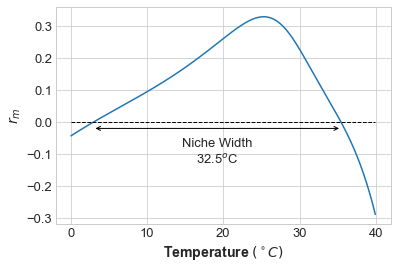

In [83]:
#Calculate r_m (using the approximation)

r_m_vec = r_SP_app_lam(bpk_vec, zJ_vec, z_vec, kap_vec, alp_vec)

def find_niche_width(TPC, T_vec):
   
    TPC_low = TPC[0:np.argmax(TPC)]
    TPC_high = TPC[np.argmax(TPC):len(TPC)]
    
    T_vec_low = T_vec[0:np.argmax(TPC)]
    T_vec_high = T_vec[np.argmax(TPC):len(TPC)]
    
    r_0_low = T_vec_low[(np.abs(TPC_low).argmin())]
    r_0_high = T_vec_high[(np.abs(TPC_high).argmin())]
    
    return [r_0_low, r_0_high]

r_niche = find_niche_width(r_m_vec, T_vec)

r_niche_width = r_niche[1]-r_niche[0]

fig = plt.figure(); ax = fig.add_subplot(111)
ax.plot(T_vec-273.15, r_m_vec);
#ax.plot([T_pk_par, T_pk_par], [ax.get_ylim()[0],ax.get_ylim()[1]], color='k', linestyle='--', linewidth=1)
ax.plot(T_vec-273.15, [0]*len(T_vec), color='k', linestyle='--', linewidth=1);
plt.annotate(s='', xy=(r_niche[0]-273.15,-0.02), xytext=(r_niche[1]-273.15,-0.02), arrowprops=dict(arrowstyle='<->'))
ax.text((r_niche[0]+r_niche[1])/2-273.15, -0.05, 'Niche Width\n'+str(r_niche_width)+'$^o$C',  horizontalalignment='center', verticalalignment='top', fontsize=13)
ax.set_xlabel('Temperature $(^\circ C)$', fontsize=14, fontweight = 'bold'); 
ax.set_ylabel('$r_m$', fontsize=14, fontweight = 'bold')
ax.tick_params(axis='x', labelsize=13);
ax.tick_params(axis='y', labelsize=13);

plt.savefig('../results/r_TPC.pdf')

# The sensitivity of  thermal optimum and thermal niche of $r_{m}$

In order to assess the impact of mismatches between the thermal optima of different lifestages on the population growth rate of disease vectors, we evaluate the model across a range of values of the thermal optima ($T_{pk}$) of juvenile traits.

Consistent with the "hotter is better" hypothesis of thermal adaptation, the reference temperature ($T_{ref}$) is kept constant for all traits in order to keep the normalization constants the same despite shifts in $T_{pk}$.

Plot A below shows how the TPC for population density changes in response to thermal mismatches in the optima of juvenile and adult traits, with blue curves indicating a lower thermal optima for juvenile traits and red curves a higher thermal optima. Plots B-D show how important properties of the TPC for population density change in response to thermal mismatches, with substantial changes in the thermal optimum, the intrinsic population growth rate at the thermal optimum, and the width of the thermal niche, here measured by the width of the curve at 80% of it's maximum value. 

In [91]:
colormap(1)

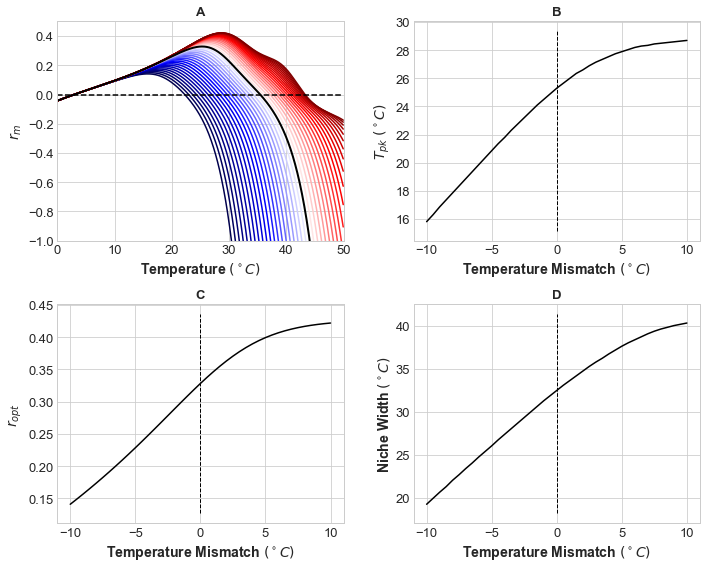

In [93]:
T_vec = 273.15+np.arange(0, 50, 0.05) #Vector of temperatures

alp_vec = B_inv_lam(B_0_alp,E_alp,T_pk_alp+273.15,T_ref_par,E_D_alp,k_par,T_vec)
bpk_vec = B_lam(B_0_bpk,E_bpk,T_pk_bpk+273.15,T_ref_par,E_D_bpk,k_par,T_vec)
z_vec = B_inv_lam(B_0_z,E_z,T_pk_z+273.15,T_ref_par,E_D_z,k_par,T_vec)
zJ_vec = B_inv_lam(B_0_zJ,E_zJ,T_pk_zJ+273.15,T_ref_par,E_D_zJ,k_par,T_vec)
kap_vec = B_lam(B_0_kap,E_kap,T_pk_kap+273.15,T_ref_par,E_D_kap,k_par,T_vec)

r_m_vec = r_SP_app_lam(bpk_vec, zJ_vec, z_vec, kap_vec, alp_vec)

T_pk_mm = T_pk_par + np.arange(-10,10.5,0.5) # new peaks
T_ref_mm = T_ref_par

r_pk_vec = ["NA"]*len(T_pk_mm)
T_pk_vec = ["NA"]*len(T_pk_mm)
r_0_vec = ["NA"]*len(T_pk_mm)

fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(221)
ax.set_title('A', fontsize=13, fontweight = 'bold') 

colormap = plt.cm.seismic 
ax.set_prop_cycle('color',[colormap(i) for i in np.linspace(0, 1, len(T_pk_mm))])

for i in range(len(T_pk_mm)):

    alp_mm_tmp_vec = B_inv_lam(B_0_alp,E_alp,T_pk_mm[i]+273.15,T_ref_mm,E_D_alp,k_par,T_vec)
    zJ_mm_tmp_vec = B_inv_lam(B_0_zJ,E_zJ,T_pk_mm[i]+273.15,T_ref_mm,E_D_zJ,k_par,T_vec)
    
    r_mm_tmp_vec = r_SP_app_lam(bpk_vec,zJ_mm_tmp_vec, z_vec, kap_vec, alp_mm_tmp_vec)
    r_pk_vec[i] = max(r_mm_tmp_vec)
    T_pk_vec[i] = T_vec[np.argmax(r_mm_tmp_vec)]
    
    r_nw_tmp = find_niche_width(r_mm_tmp_vec, T_vec)
    
    r_0_vec[i] = r_nw_tmp[1] - r_nw_tmp[0]
    
    ax.plot(T_vec-273.15, r_mm_tmp_vec)


ax.plot(T_vec-273.15, r_m_vec, 'black', linewidth = 2);
ax.plot(T_vec-273.15, [0]*len(T_vec), "k--")
ax.set_xlabel('Temperature $(^\circ C)$', fontsize=14, fontweight = 'bold'); 
ax.set_ylabel('$r_m$', fontsize=14, fontweight = 'bold');
ax.set_ylim(-1,0.5);
ax.set_xlim(0,50)
ax.tick_params(axis='x', labelsize=13); ax.tick_params(axis='y', labelsize=13);

ax = fig.add_subplot(222)
ax.set_title('B', fontsize=13, fontweight = 'bold') 
ax.plot(T_pk_mm - T_pk_par, np.asarray(T_pk_vec)-273.15, 'black');
ax.plot([0, 0], [ax.get_ylim()[0],ax.get_ylim()[1]], color='k', linestyle='--', linewidth=1);
ax.set_xlabel('Temperature Mismatch $(^\circ C)$', fontsize=14, fontweight = 'bold'); 
ax.set_ylabel('$T_{pk}$ $(^\circ C)$', fontsize=14, fontweight = 'bold')
ax.tick_params(axis='x', labelsize=13); ax.tick_params(axis='y', labelsize=13);

ax = fig.add_subplot(223)
ax.set_title('C', fontsize=13, fontweight = 'bold') 
ax.plot(T_pk_mm - T_pk_par, r_pk_vec, 'black');
ax.plot([0, 0], [ax.get_ylim()[0],ax.get_ylim()[1]], color='k', linestyle='--', linewidth=1);
ax.set_xlabel('Temperature Mismatch $(^\circ C)$', fontsize=14, fontweight = 'bold'); 
ax.set_ylabel('$r_{opt}$', fontsize=14, fontweight = 'bold')
ax.tick_params(axis='x', labelsize=13); ax.tick_params(axis='y', labelsize=13);

ax = fig.add_subplot(224)
ax.set_title('D', fontsize=13, fontweight = 'bold') 
ax.plot(T_pk_mm - T_pk_par, r_0_vec, 'black');
ax.plot([0, 0], [ax.get_ylim()[0],ax.get_ylim()[1]], color='k', linestyle='--', linewidth=1);
ax.set_xlabel('Temperature Mismatch $(^\circ C)$', fontsize=14, fontweight = 'bold'); 
ax.set_ylabel('Niche Width $(^\circ C)$', fontsize=14, fontweight = 'bold')
ax.tick_params(axis='x', labelsize=13); ax.tick_params(axis='y', labelsize=13);

fig.tight_layout()

plt.savefig('../results/ThermMM.pdf')

# The temperature-dependent trait sensitivity analysis

In order to determine the traits driving the sensitivity of the TPC for population growth rate to thermal mismatches between between juvenile and adult traits, we assess the sensitivity of the model to temperature dependence of each parameter.

This can be determined by using the chain rule to determine the relative contribution of the temperature dependence of each parameter to the temperature dependence of population growth rate. The relative contribution of a parameter can be expressed as the product of the partial derivative of population growth rate ($r_m$) with respect to a parameter and the derivative of that parameter with respect to temperature:

\begin{equation}
\frac{\mathrm{d}r_m}{\mathrm{d}T} = 
\frac{\partial r_m}{\partial b_{pk}} \frac{\mathrm{d}b_{pk}}{\mathrm{d}T} + 
\frac{\partial r_m}{\partial \alpha}\frac{\mathrm{d}\alpha}{\mathrm{d}T} + 
\frac{\partial r_m}{\partial z} \frac{\mathrm{d}z}{\mathrm{d}T} +
\frac{\partial r_m}{\partial z_J} \frac{\mathrm{d}z_J}{\mathrm{d}T} + 
\frac{\partial r_m}{\partial \kappa} \frac{\mathrm{d}\kappa}{\mathrm{d}T} 
\end{equation}

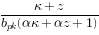

In [49]:
dr_dbpk = diff(r_SP_app, b_pk); simplify(dr_dbpk) 

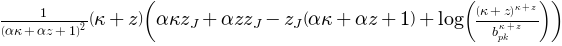

In [50]:
dr_dalp = diff(r_SP_app, alpha); simplify(dr_dalp)

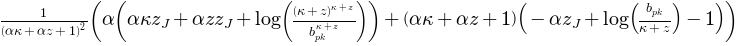

In [51]:
dr_dz = diff(r_SP_app, z); simplify(dr_dz)

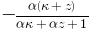

In [52]:
dr_dzJ = diff(r_SP_app, z_J); simplify(dr_dzJ)

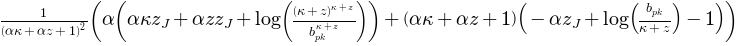

In [53]:
dr_dkap = diff(r_SP_app, kappa); simplify(dr_dkap)

For the TPC model, we ony need to calculate the derivative wrt $T$ for either the function $B$ (for parameters that are rates) or the 1/$B$ (for parameters that are times):

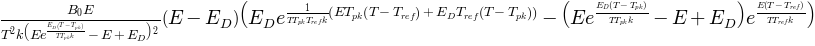

In [54]:
dBdT =  diff(B, T); simplify(dBdT)

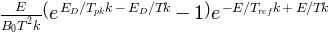

In [55]:
dB_invdT =  diff(B_inv, T); simplify(dB_invdT)

In [56]:
alp_vec = B_inv_lam(B_0_alp,E_alp,T_pk_alp+273.15,T_ref_par,E_D_alp,k_par,T_vec)
bpk_vec = B_lam(B_0_bpk,E_bpk,T_pk_bpk+273.15,T_ref_par,E_D_bpk,k_par,T_vec)
z_vec = B_inv_lam(B_0_z,E_z,T_pk_z+273.15,T_ref_par,E_D_z,k_par,T_vec)
zJ_vec = B_inv_lam(B_0_zJ,E_zJ,T_pk_zJ+273.15,T_ref_par,E_D_zJ,k_par,T_vec)
kap_vec = B_lam(B_0_kap,E_kap,T_pk_kap+273.15,T_ref_par,E_D_kap,k_par,T_vec)

r_m_vec = r_SP_app_lam(bpk_vec, zJ_vec, z_vec, kap_vec, alp_vec)

#Get the lambdified pd functions

dr_dbpk_lam = lambdify((b_pk, alpha, z, kappa), dr_dbpk, np)
dr_dalp_lam = lambdify((b_pk, alpha, z, z_J, kappa), dr_dalp, np)
dr_dz_lam = lambdify((b_pk, alpha, z, z_J, kappa), dr_dz, np)
dr_dzJ_lam = lambdify((alpha, z, kappa), dr_dzJ, np)
dr_dkap_lam = lambdify((b_pk, alpha, z, z_J, kappa), dr_dkap, np)

dbpk_dT_lam = lambdify((B_0,E,T_pk,T_ref,E_D,k,T), dBdT, np)
dalp_dT_lam = lambdify((B_0,E,T_pk,T_ref,E_D,k,T), dB_invdT, np)
dz_dT_lam =  lambdify((B_0,E,T_pk,T_ref,E_D,k,T), dB_invdT, np)   
dzJ_dT_lam =  lambdify((B_0,E,T_pk,T_ref,E_D,k,T), dB_invdT, np)
dkap_dT_lam =  lambdify((B_0,E,T_pk,T_ref,E_D,k,T), dBdT, np)

#Evaluate

dr_dbpk_vec = dr_dbpk_lam(bpk_vec, alp_vec, z_vec, kap_vec)
dr_dalp_vec = dr_dalp_lam(bpk_vec, alp_vec, z_vec, zJ_vec, kap_vec)
dr_dz_vec = dr_dz_lam(bpk_vec, alp_vec, z_vec, zJ_vec, kap_vec)
dr_dzJ_vec =  dr_dzJ_lam(alp_vec, z_vec, kap_vec)
dr_dkap_vec = dr_dkap_lam(bpk_vec, alp_vec, z_vec, zJ_vec, kap_vec)

dbpk_dT_vec = dbpk_dT_lam(B_0_bpk,E_bpk,T_pk_bpk+273.15,T_ref_par,E_D_bpk,k_par,T_vec)
dalp_dT_vec = dalp_dT_lam (B_0_alp,E_alp,T_pk_alp+273.15,T_ref_par,E_D_alp,k_par,T_vec)
dz_dT_vec =  dz_dT_lam(B_0_z,E_z,T_pk_z+273.15,T_ref_par,E_D_z,k_par,T_vec)  
dzJ_dT_vec =  dzJ_dT_lam(B_0_zJ,E_zJ,T_pk_zJ+273.15,T_ref_par,E_D_zJ,k_par,T_vec)
dkap_dT_vec =  dkap_dT_lam(B_0_kap,E_kap,T_pk_kap+273.15,T_ref_par,E_D_kap,k_par,T_vec)

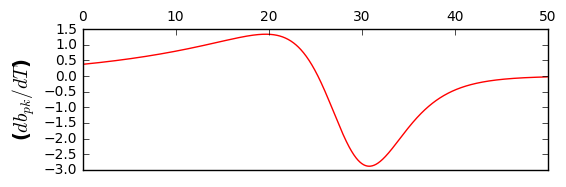

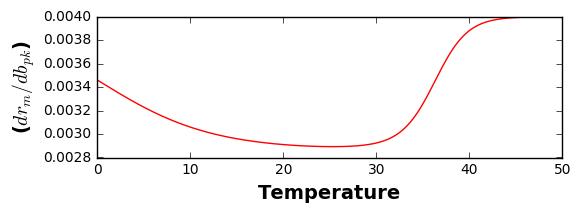

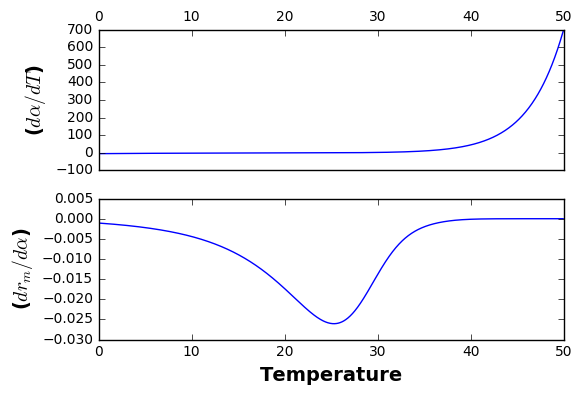

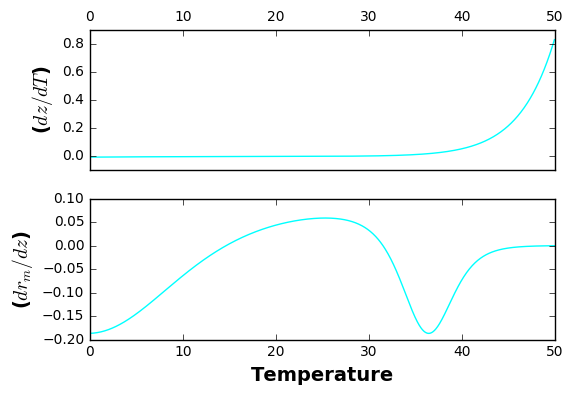

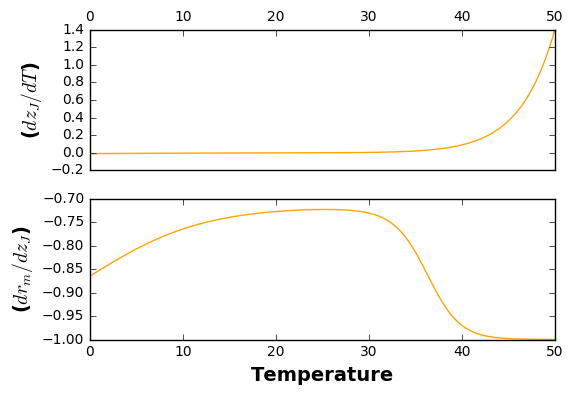

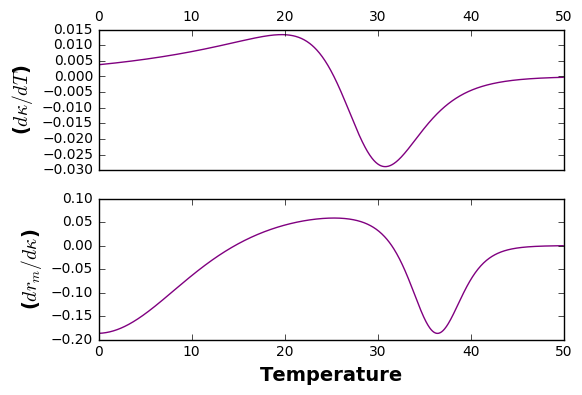

In [62]:
fig = plt.figure(); ax = fig.add_subplot(211)
ax.plot(T_vec-273.15, dbpk_dT_vec, "red");
ax.set_xlim([0,50]);
ax.xaxis.set_ticks_position('top');
ax.set_ylabel('($d b_{pk}/dT$)', fontsize=14, fontweight = 'bold')

fig = plt.figure(); ax = fig.add_subplot(212)
ax.plot(T_vec-273.15, dr_dbpk_vec, "red");
ax.set_xlim([0,50]);
ax.set_xlabel('Temperature', fontsize=14, fontweight = 'bold'); 
ax.set_ylabel('($dr_m / db_{pk}$)', fontsize=14, fontweight = 'bold')

fig = plt.figure(); ax = fig.add_subplot(211)
ax.plot(T_vec-273.15, dalp_dT_vec, "blue");
ax.set_xlim([0,50]);
ax.xaxis.set_ticks_position('top');
ax.set_ylabel(r'($d\alpha/dT$)', fontsize=14, fontweight = 'bold')

ax = fig.add_subplot(212)
ax.plot(T_vec-273.15, dr_dalp_vec, "blue");
ax.set_xlim([0,50]);
ax.set_xlabel('Temperature', fontsize=14, fontweight = 'bold'); 
ax.set_ylabel(r'($dr_m/d\alpha$)', fontsize=14, fontweight = 'bold')

fig = plt.figure(); ax = fig.add_subplot(211)
ax.plot(T_vec-273.15, dz_dT_vec, "cyan");
ax.set_xlim([0,50]);
ax.xaxis.set_ticks_position('top');
ax.set_ylabel('($dz/dT$)', fontsize=14, fontweight = 'bold')

ax = fig.add_subplot(212)
ax.plot(T_vec-273.15, dr_dz_vec, "cyan");
ax.set_xlim([0,50]);
ax.set_xlabel('Temperature', fontsize=14, fontweight = 'bold'); 
ax.set_ylabel('($dr_m/dz$)', fontsize=14, fontweight = 'bold')

fig = plt.figure(); ax = fig.add_subplot(211)
ax.plot(T_vec-273.15, dzJ_dT_vec, "orange"); 
ax.set_xlim([0,50]);
ax.xaxis.set_ticks_position('top');
ax.set_ylabel('($dz_J/dT$)', fontsize=14, fontweight = 'bold')

ax = fig.add_subplot(212)
ax.plot(T_vec-273.15, dr_dzJ_vec, "orange");
ax.set_xlim([0,50]);
ax.set_xlabel('Temperature', fontsize=14, fontweight = 'bold'); 
ax.set_ylabel('($dr_m/dz_J$)', fontsize=14, fontweight = 'bold')

fig = plt.figure(); ax = fig.add_subplot(211)
ax.plot(T_vec-273.15, dkap_dT_vec, "purple");
ax.set_xlim([0,50]);
ax.xaxis.set_ticks_position('top');
ax.set_ylabel(r'($d\kappa/dT$)', fontsize=14, fontweight = 'bold')

ax = fig.add_subplot(212)
ax.plot(T_vec-273.15, dr_dkap_vec, "purple");
ax.set_xlim([0,50]);
ax.set_xlabel('Temperature', fontsize=14, fontweight = 'bold'); 
ax.set_ylabel(r'($dr_m/d\kappa$)', fontsize=14, fontweight = 'bold')

In [63]:
dr_dbpk_dT_vec = dr_dbpk_vec * dbpk_dT_vec
dr_dalp_dT_vec = dr_dalp_vec * dalp_dT_vec
dr_dz_dT_vec = dr_dz_vec * dz_dT_vec
dr_dzJ_dT_vec = dr_dzJ_vec * dzJ_dT_vec
dr_dkap_dT_vec = dr_dkap_vec * dkap_dT_vec

dr_dT_vec = dr_dbpk_dT_vec + dr_dalp_dT_vec + dr_dz_dT_vec + dr_dzJ_dT_vec + dr_dkap_dT_vec
dr_dT_A_vec = dr_dbpk_dT_vec + dr_dz_dT_vec + dr_dkap_dT_vec
dr_dT_J_vec = dr_dalp_dT_vec + dr_dzJ_dT_vec

Having evaluated these terms, we can plot the relative contribution of each parameter to the TPC for $r_m$. The sensitivity of population density to the thermal sensitivity of each parameter can be assess by the deviation of the line for the partial derivative with respect to each parameter from zero.

Furthermore, traits can be summed together by lifestage, with development rate and juvenile mortality categorised as juvenile traits and adult mortality, fecundity, and rate of loss of fecundity as adult traits, to determine the relative contribution of the TPC of each lifestage to the TPC of of $r_m$, again with greater deviation from zero indicating a greater contribution.

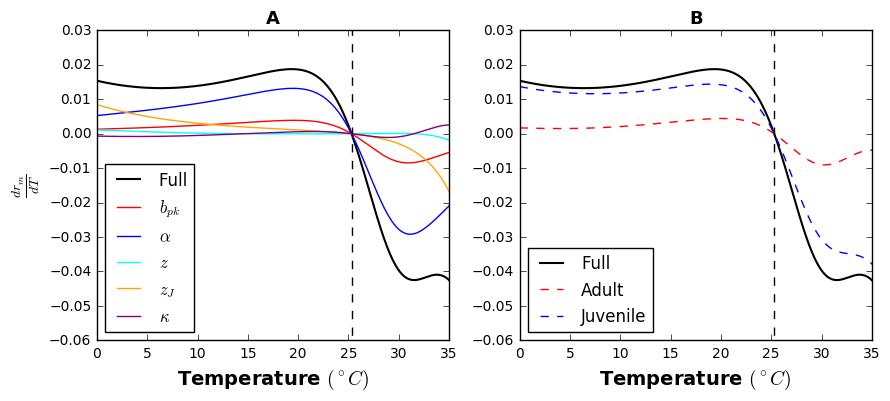

In [68]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(121)
ax.set_title('A', fontsize=13, fontweight = 'bold') 
ax.plot(T_vec-273.15,dr_dT_vec, 'black',linewidth=1.5)
ax.plot(T_vec-273.15,dr_dbpk_dT_vec, 'red')
ax.plot(T_vec-273.15,dr_dalp_dT_vec, 'blue')
ax.plot(T_vec-273.15,dr_dz_dT_vec, 'cyan')
ax.plot(T_vec-273.15,dr_dzJ_dT_vec, 'orange')
ax.plot(T_vec-273.15,dr_dkap_dT_vec, 'purple')
ax.plot([T_pk_par, T_pk_par], [ax.get_ylim()[0],ax.get_ylim()[1]], color='k', linestyle='--', linewidth=1)
ax.set_xlim([0,35])
ax.set_ylim([-0.06,0.03])
ax.set_xlabel('Temperature $(^\circ C)$', fontsize=14, fontweight = 'bold'); 
ax.set_ylabel(r'$\frac{dr_m}{dT}$', fontsize=14, fontweight = 'bold');
plt.legend(['Full', '$b_{pk}$', r'$\alpha$', '$z$', '$z_J$', r'$\kappa$'], loc='lower left') #Add kappa to legend if included in analysis

ax = fig.add_subplot(122)
ax.set_title('B', fontsize=13, fontweight = 'bold'); 
ax.plot(T_vec-273.15,dr_dT_vec, 'black',linewidth=1.5);
ax.plot(T_vec-273.15,dr_dT_A_vec, 'r--');
ax.plot(T_vec-273.15,dr_dT_J_vec, 'b--');
ax.plot([T_pk_par, T_pk_par], [ax.get_ylim()[0],ax.get_ylim()[1]], color='k', linestyle='--', linewidth=1)
ax.set_xlim([0,35])
ax.set_ylim([-0.06,0.03])
ax.set_xlabel('Temperature $(^\circ C)$', fontsize=14, fontweight = 'bold'); 
#ax.set_ylabel(r'$\frac{dM}{dT}$', fontsize=14, fontweight = 'bold');
plt.legend(['Full', 'Adult', 'Juvenile'], loc='lower left')

plt.savefig('../results/r_sens1.pdf')

The sensitivity of the $r_m$ TPC to the the thermal sensitivity of the life history traits can also be assessed by holding each parameter constant in turn. When plotting the thermal performance of population density with each parameter held constant, greater deviation from the full model indicates greater contribution from the thermal dependence of that parameter. Again, traits may be grouped by life history stage to assess the combined contribitution of thermal sensitivty of each lifestage.

In [69]:
r_bpk_cons_vec = r_SP_app_lam(b_pk_par,zJ_vec, z_vec, kap_vec, alp_vec)

r_alp_cons_vec = r_SP_app_lam(bpk_vec,zJ_vec, z_vec, kap_vec, alp_par)

r_z_cons_vec = r_SP_app_lam(bpk_vec,zJ_vec, z_par, kap_vec, alp_vec)

r_zJ_cons_vec = r_SP_app_lam(bpk_vec,z_J_par, z_vec, kap_vec, alp_vec)

r_kap_cons_vec = r_SP_app_lam(bpk_vec,zJ_vec, z_vec, kap_par, alp_vec)

r_J_cons_vec = r_SP_app_lam(bpk_vec, z_J_par, z_vec, kap_vec, alp_par)

r_A_cons_vec = r_SP_app_lam(b_pk_par,zJ_vec, z_par, kap_par, alp_vec)


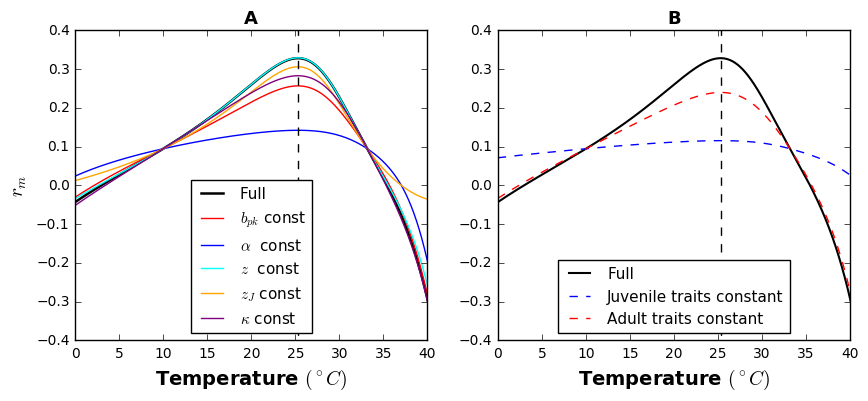

In [70]:
fig = plt.figure(figsize=(10, 4))

ax = fig.add_subplot(121)
ax.set_title('A', fontsize=13, fontweight = 'bold'); 

ax.plot(T_vec-273.15,r_m_vec, 'black',linewidth=1.8);
ax.plot(T_vec-273.15,r_bpk_cons_vec, 'red');
ax.plot(T_vec-273.15,r_alp_cons_vec, 'blue');
ax.plot(T_vec-273.15,r_z_cons_vec, 'cyan');
ax.plot(T_vec-273.15,r_zJ_cons_vec, 'orange');
ax.plot(T_vec-273.15,r_kap_cons_vec, 'purple');
ax.plot([T_pk_par, T_pk_par], [ax.get_ylim()[0],ax.get_ylim()[1]], color='k', linestyle='--', linewidth=1)
ax.set_xlim([0,40])
ax.set_ylim([-0.4,0.4])
ax.set_xlabel('Temperature $(^\circ C)$', fontsize=14, fontweight = 'bold'); 
ax.set_ylabel('$r_m$', fontsize=14, fontweight = 'bold');
plt.legend(['Full', '$b_{pk}$ const', r'$\alpha$  const', '$z$  const', '$z_J$ const',r'$\kappa$ const'], loc='lower center',fontsize=11) #Add kappa to legend if included in analysis

ax = fig.add_subplot(122)
ax.set_title('B', fontsize=13, fontweight = 'bold'); 
ax.plot(T_vec-273.15,r_m_vec, 'black',linewidth=1.5);
ax.plot(T_vec-273.15,r_J_cons_vec, 'b--');
ax.plot(T_vec-273.15,r_A_cons_vec, 'r--');
ax.plot([T_pk_par, T_pk_par], [ax.get_ylim()[0],ax.get_ylim()[1]], color='k', linestyle='--', linewidth=1)
ax.set_xlim([0,40])
ax.set_ylim([-0.4,0.4])
plt.legend(['Full', 'Juvenile traits constant', 'Adult traits constant'], loc='lower center',fontsize=11) #Add kappa to legend if included in analysis
ax.set_xlabel('Temperature $(^\circ C)$', fontweight = 'bold',fontsize=14)
#ax.set_ylabel('$M$', fontsize=14, fontweight = 'bold');

#fig.tight_layout()

plt.savefig('../results/r_sens2.pdf')

# The sensitivity of the model to the parametrisation of loss of fecundity ($\kappa$)

Fecundity often declines over time. This decline can have substantial impacts on the lifetime reproduction of individuals and therefore fitness. The rate at which fecundity declines with age may be temperature dependent, but there is little exisiting research into the impact of temperature on decline in fecundity in arthropods.

In the absence of strong evidence for the thermal sensitivity of loss of fecundity, or a unimodal relationship between temperature and rate of loss of fecundity, we assess the sensitivity of the model to changes in the parametrisation of rate of loss of fecundity ($\kappa$). We evalauate the model across a broad range of values, including no loss of fecundity with age ($\kappa = 0$).

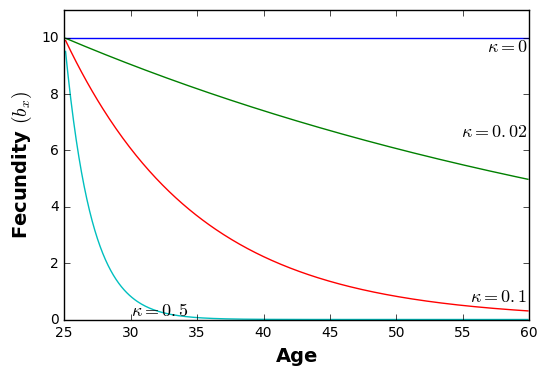

In [72]:
fig = plt.figure(); ax = fig.add_subplot(111)
#b_x_vec = np.array([b_x.evalf(subs = {b_pk:b_pk_par, x:age, alpha:alp_par, kappa:kap_par}) for age in x_vec])#use lambidy to speed up
b_x_lam = lambdify((b_pk, kappa, alpha, x), b_x, np)
b_x_vec = b_x_lam(b_pk_par, 0, alp_par, x_vec[x_vec>alp_par])

kap_range = [0,0.02,0.1,0.5]

ax.plot(x_vec[x_vec>alp_par], b_x_lam(b_pk_par, kap_range[0], alp_par, x_vec[x_vec>alp_par]));
ax.text(max(x_vec), 10, '$\kappa = 0$', horizontalalignment = "right", verticalalignment = "top", fontsize = 13);
ax.plot(x_vec[x_vec>alp_par], b_x_lam(b_pk_par, kap_range[1], alp_par, x_vec[x_vec>alp_par]));
ax.text(max(x_vec), 7, '$\kappa = 0.02$', horizontalalignment = "right", verticalalignment = "top", fontsize = 13);
ax.plot(x_vec[x_vec>alp_par], b_x_lam(b_pk_par, kap_range[2], alp_par, x_vec[x_vec>alp_par]));
ax.text(max(x_vec), 0.5, '$\kappa = 0.1$', horizontalalignment = "right", verticalalignment = "bottom", fontsize = 13);
ax.plot(x_vec[x_vec>alp_par], b_x_lam(b_pk_par, kap_range[3], alp_par, x_vec[x_vec>alp_par]));
ax.text(30, 0, '$\kappa = 0.5$', horizontalalignment = "left", verticalalignment = "bottom", fontsize = 13);
ax.set_xlabel('Age', fontsize=14, fontweight = 'bold');
ax.set_ylim([0,b_pk_par*1.1]);
ax.set_ylabel('Fecundity $(b_x)$', fontsize=14, fontweight = 'bold')
#ax.text(sc.mean(x_vec[x_vec>alp_par]), sc.amax(b_x_vec)/2,
#        r'$\alpha = ' + str(alp_par)+'$ \n' +
#        r'$b_{pk} = ' + str(b_pk_par)+'$ \n',
#        horizontalalignment='left', verticalalignment='top', fontsize=15)
plt.savefig('../results/kappa_plot.pdf')

In order to the assess the uncertainty in the rate of loss of fecundity ($\kappa$), we can evaluate the model with extreme parameter values of $\kappa$. We did this increasing and decreasing the normalisation constant for $\kappa$ ($\kappa_0$) by a factor of five, resulting in TPCs with values five times greater than and a fifth less than the TPC for $\kappa$ above.

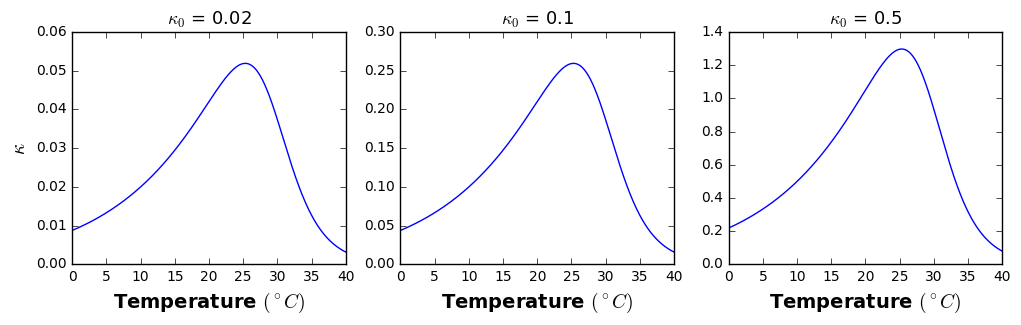

In [73]:
kap_vec_high = B_lam(0.5,E_kap,T_pk_kap+273.15,T_ref_par,E_D_kap,k_par,T_vec)
kap_vec_low = B_lam(0.02,E_kap,T_pk_kap+273.15,T_ref_par,E_D_kap,k_par,T_vec)

fig = plt.figure(figsize=(12, 3))

ax = fig.add_subplot(131)

ax.plot(T_vec-273.15, kap_vec_low);
ax.set_xlim([0,40])
ax.set_xlabel('Temperature $(^\circ C)$', fontsize=14, fontweight = 'bold'); 
ax.set_ylabel(r'$\kappa$', fontsize=14, fontweight = 'bold')
ax.set_title('$\kappa_0$ = ' + str(0.02), fontsize=13) 

ax = fig.add_subplot(132)

ax.plot(T_vec-273.15, kap_vec);
ax.set_xlim([0,40])
ax.set_xlabel('Temperature $(^\circ C)$', fontsize=14, fontweight = 'bold'); 
#ax.set_ylabel(r'$\kappa$', fontsize=14, fontweight = 'bold')
ax.set_title('$\kappa_0$ = ' + str(0.1), fontsize=13) 

ax = fig.add_subplot(133)

ax.plot(T_vec-273.15, kap_vec_high);
ax.set_xlim([0,40])
ax.set_xlabel('Temperature $(^\circ C)$', fontsize=14, fontweight = 'bold'); 
#ax.set_ylabel(r'$\kappa$', fontsize=14, fontweight = 'bold')
ax.set_title('$\kappa_0$ = ' + str(0.5), fontsize=13) 

These new TPCs for $\kappa$ were used to evaluate the model across a range of thermal mismatches between adult and juvenile life history traits as above.

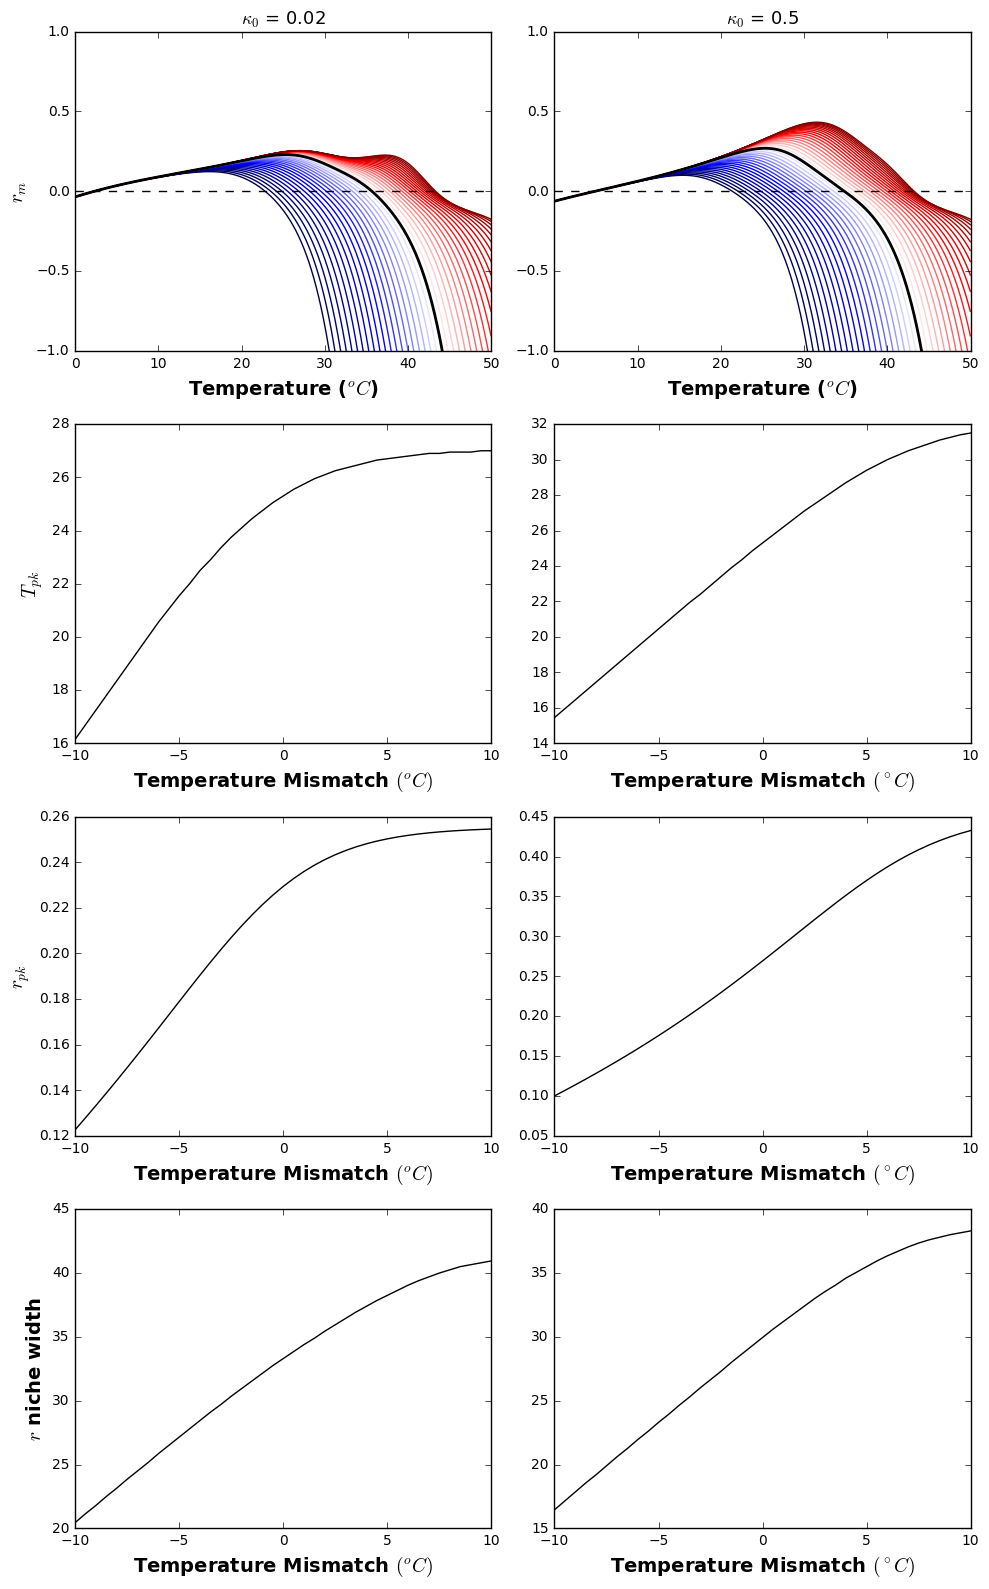

In [74]:
fig = plt.figure(figsize=(10, 16))

ax = fig.add_subplot(421)
ax.set_title('$\kappa_0$ = ' + str(0.02), fontsize=13) 
ax.set_xlabel('Temperature ($^oC$)', fontsize=14, fontweight = 'bold'); 
ax.set_ylabel('$r_m$', fontsize=14, fontweight = 'bold');

r_m_vec = r_SP_app_lam(bpk_vec, zJ_vec, z_vec, kap_vec_low, alp_vec)

r_pk_vec = ["NA"]*len(T_pk_mm)
T_pk_vec = ["NA"]*len(T_pk_mm)
r_0_vec = ["NA"]*len(T_pk_mm)

colormap = plt.cm.seismic
#colormap = grayify_cmap(colormap)
cm = [colormap(i) for i in np.linspace(0, 1, len(T_pk_mm))]
plt.gca().set_color_cycle(cm)

for i in range(len(T_pk_mm)):

    alp_mm_tmp_vec = B_inv_lam(B_0_alp,E_alp,T_pk_mm[i]+273.15,T_ref_mm,E_D_alp,k_par,T_vec)
    zJ_mm_tmp_vec = B_inv_lam(B_0_zJ,E_zJ,T_pk_mm[i]+273.15,T_ref_mm,E_D_zJ,k_par,T_vec)
    
    r_mm_tmp_vec = r_SP_app_lam(bpk_vec,zJ_mm_tmp_vec, z_vec, kap_vec_low, alp_mm_tmp_vec)
    
    r_pk_vec[i] = max(r_mm_tmp_vec)
    T_pk_vec[i] = T_vec[np.argmax(r_mm_tmp_vec)]
    
    r_nw_tmp = find_niche_width(r_mm_tmp_vec, T_vec)
    
    r_0_vec[i] = r_nw_tmp[1] - r_nw_tmp[0]
    
    ax.plot(T_vec-273.15, r_mm_tmp_vec)

ax.plot(T_vec-273.15, r_m_vec, 'black', linewidth = 2);
ax.plot(T_vec-273.15, [0]*len(T_vec), "k--");
plt.ylim(-1,1)

ax = fig.add_subplot(423)
#ax.set_title('B', fontsize=13, fontweight = 'bold') 
ax.plot(T_pk_mm - T_pk_par, np.asarray(T_pk_vec)-273.15, 'black');
ax.set_xlabel('Temperature Mismatch $(^oC)$', fontsize=14, fontweight = 'bold'); 
ax.set_ylabel('$T_{pk}$', fontsize=14, fontweight = 'bold')

ax = fig.add_subplot(425)
#ax.set_title('C', fontsize=13, fontweight = 'bold') 
ax.plot(T_pk_mm - T_pk_par, r_pk_vec, 'black');
ax.set_xlabel('Temperature Mismatch $(^oC)$', fontsize=14, fontweight = 'bold'); 
ax.set_ylabel('$r_{pk}$', fontsize=14, fontweight = 'bold')

ax = fig.add_subplot(427)
#ax.set_title('D', fontsize=13, fontweight = 'bold') 
ax.plot(T_pk_mm - T_pk_par, r_0_vec, 'black');
ax.set_xlabel('Temperature Mismatch $(^oC)$', fontsize=14, fontweight = 'bold'); 
ax.set_ylabel('$r$ niche width', fontsize=14, fontweight = 'bold')


ax = fig.add_subplot(422)
ax.set_title('$\kappa_0$ = ' + str(0.5), fontsize=13) 
ax.set_xlabel('Temperature ($^oC$)', fontsize=14, fontweight = 'bold'); 
#ax.set_ylabel('$r_m$', fontsize=14, fontweight = 'bold');

r_m_vec = r_SP_app_lam(bpk_vec, zJ_vec, z_vec, kap_vec_high, alp_vec)

r_pk_vec = ["NA"]*len(T_pk_mm)
T_pk_vec = ["NA"]*len(T_pk_mm)
r_0_vec = ["NA"]*len(T_pk_mm)

colormap = plt.cm.seismic
#colormap = grayify_cmap(colormap)
cm = [colormap(i) for i in np.linspace(0, 1, len(T_pk_mm))]
plt.gca().set_color_cycle(cm)

for i in range(len(T_pk_mm)):

    alp_mm_tmp_vec = B_inv_lam(B_0_alp,E_alp,T_pk_mm[i]+273.15,T_ref_mm,E_D_alp,k_par,T_vec)
    zJ_mm_tmp_vec = B_inv_lam(B_0_zJ,E_zJ,T_pk_mm[i]+273.15,T_ref_mm,E_D_zJ,k_par,T_vec)
    
    r_mm_tmp_vec = r_SP_app_lam(bpk_vec,zJ_mm_tmp_vec, z_vec, kap_vec_high, alp_mm_tmp_vec)
        
    r_pk_vec[i] = max(r_mm_tmp_vec)
    T_pk_vec[i] = T_vec[np.argmax(r_mm_tmp_vec)]
    
    r_nw_tmp = find_niche_width(r_mm_tmp_vec, T_vec)
    
    r_0_vec[i] = r_nw_tmp[1] - r_nw_tmp[0]
    
    ax.plot(T_vec-273.15, r_mm_tmp_vec)

ax.plot(T_vec-273.15, r_m_vec, 'black', linewidth = 2);
ax.plot(T_vec-273.15, [0]*len(T_vec), "k--");
plt.ylim(-1,1)

ax = fig.add_subplot(424)
#ax.set_title('B', fontsize=13, fontweight = 'bold') 
ax.plot(T_pk_mm - T_pk_par, np.asarray(T_pk_vec)-273.15, 'black');
ax.set_xlabel('Temperature Mismatch $(^\circ C)$', fontsize=14, fontweight = 'bold'); 
#ax.set_ylabel('$T_{pk}$', fontsize=14, fontweight = 'bold')

ax = fig.add_subplot(426)
#ax.set_title('C', fontsize=13, fontweight = 'bold') 
ax.plot(T_pk_mm - T_pk_par, r_pk_vec, 'black');
ax.set_xlabel('Temperature Mismatch $(^\circ C)$', fontsize=14, fontweight = 'bold'); 
#ax.set_ylabel('$r_{pk}$', fontsize=14, fontweight = 'bold')

ax = fig.add_subplot(428)
#ax.set_title('D', fontsize=13, fontweight = 'bold') 
ax.plot(T_pk_mm - T_pk_par, r_0_vec, 'black');
ax.set_xlabel('Temperature Mismatch $(^\circ C)$', fontsize=14, fontweight = 'bold'); 
#ax.set_ylabel('$r$ niche width', fontsize=14, fontweight = 'bold')


fig.tight_layout()

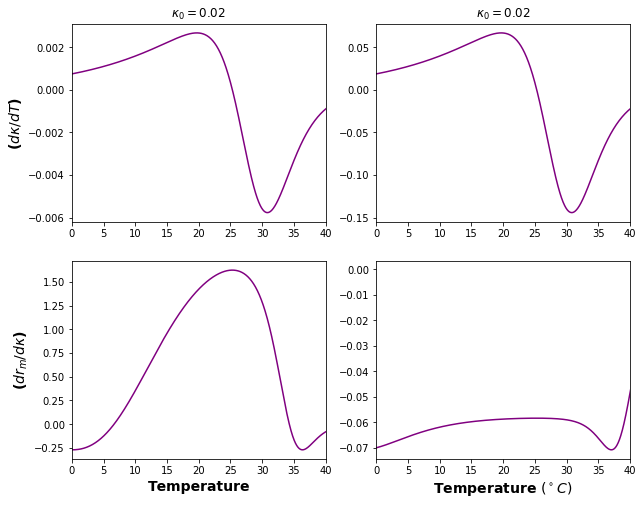

In [135]:
kap_vec_low = B_lam(0.02,E_kap,T_pk_kap+273.15,T_ref_par,E_D_kap,k_par,T_vec)
kap_vec_high = B_lam(0.5,E_kap,T_pk_kap+273.15,T_ref_par,E_D_kap,k_par,T_vec)

dr_dkap_vec_low = dr_dkap_lam(bpk_vec, alp_vec, z_vec, zJ_vec, kap_vec_low)
dr_dkap_vec_high = dr_dkap_lam(bpk_vec, alp_vec, z_vec, zJ_vec, kap_vec_high)

dkap_dT_vec_low =  dkap_dT_lam(0.02,E_kap,T_pk_kap+273.15,T_ref_par,E_D_kap,k_par,T_vec)
dkap_dT_vec_high =  dkap_dT_lam(0.5,E_kap,T_pk_kap+273.15,T_ref_par,E_D_kap,k_par,T_vec)

fig = plt.figure(figsize = (10,8)); ax = fig.add_subplot(221)
ax.plot(T_vec-273.15, dkap_dT_vec_low, "purple");
ax.set_xlim([0,40])
ax.set_ylabel(r'($d\kappa/dT$)', fontsize=14, fontweight = 'bold')
ax.set_title("$\kappa_0 = 0.02$")

ax = fig.add_subplot(222)
ax.plot(T_vec-273.15, dkap_dT_vec_high, "purple");
ax.set_xlim([0,40])
#ax.set_ylabel(r'($d\kappa/dT$)', fontsize=14, fontweight = 'bold')
ax.set_title("$\kappa_0 = 0.5$")

ax = fig.add_subplot(223)
ax.plot(T_vec-273.15, dr_dkap_vec_low, "purple");
ax.set_xlim([0,40])
ax.set_xlabel('Temperature', fontsize=14, fontweight = 'bold'); 
ax.set_ylabel(r'($dr_m/d\kappa$)', fontsize=14, fontweight = 'bold')

ax = fig.add_subplot(224)
ax.plot(T_vec-273.15, dr_dkap_vec_high, "purple");
ax.set_xlim([0,40])
ax.set_xlabel('Temperature $(^\circ C)$', fontsize=14, fontweight = 'bold'); 
#ax.set_ylabel(r'($dr_m/d\kappa$)', fontsize=14, fontweight = 'bold')

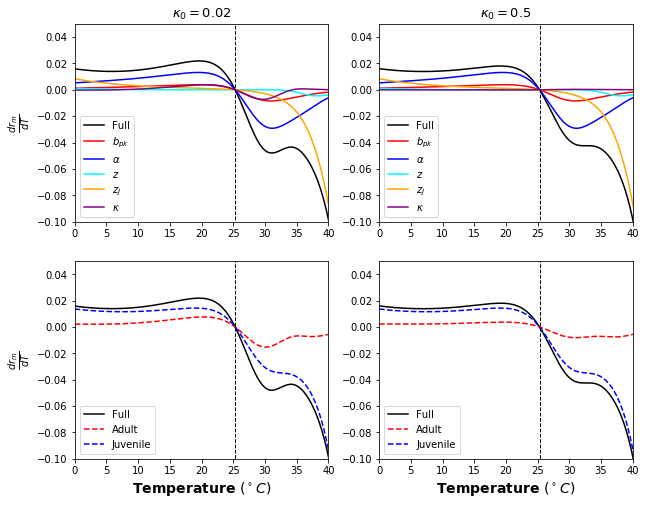

In [136]:
dr_dkap_dT_vec_low = dr_dkap_vec_low * dkap_dT_vec_low
dr_dkap_dT_vec_high = dr_dkap_vec_high * dkap_dT_vec_low

dr_dT_vec_low = dr_dbpk_dT_vec + dr_dalp_dT_vec + dr_dz_dT_vec + dr_dzJ_dT_vec + dr_dkap_dT_vec_low
dr_dT_A_vec_low = dr_dbpk_dT_vec + dr_dz_dT_vec + dr_dkap_dT_vec_low

dr_dT_vec_high = dr_dbpk_dT_vec + dr_dalp_dT_vec + dr_dz_dT_vec + dr_dzJ_dT_vec + dr_dkap_dT_vec_high
dr_dT_A_vec_high = dr_dbpk_dT_vec + dr_dz_dT_vec + dr_dkap_dT_vec_high

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(221)
ax.set_title('$\kappa_0 = 0.02$', fontsize=13, fontweight = 'bold') 
ax.plot(T_vec-273.15,dr_dT_vec_low, 'black',linewidth=1.5)
ax.plot(T_vec-273.15,dr_dbpk_dT_vec, 'red')
ax.plot(T_vec-273.15,dr_dalp_dT_vec, 'blue')
ax.plot(T_vec-273.15,dr_dz_dT_vec, 'cyan')
ax.plot(T_vec-273.15,dr_dzJ_dT_vec, 'orange')
ax.plot(T_vec-273.15,dr_dkap_dT_vec_low, 'purple')
ax.plot([T_pk_par, T_pk_par], [ax.get_ylim()[0],ax.get_ylim()[1]], color='k', linestyle='--', linewidth=1)
ax.set_xlim([0,40])
ax.set_ylim([-0.1,0.05])
#ax.set_xlabel('Temperature', fontsize=14, fontweight = 'bold'); 
ax.set_ylabel(r'$\frac{dr_m}{dT}$', fontsize=14, fontweight = 'bold');
plt.legend(['Full', '$b_{pk}$', r'$\alpha$', '$z$', '$z_J$', r'$\kappa$'], loc='lower left') #Add kappa to legend if included in analysis

ax = fig.add_subplot(222)
ax.set_title('$\kappa_0 = 0.5$', fontsize=13, fontweight = 'bold') 
ax.plot(T_vec-273.15,dr_dT_vec_high, 'black',linewidth=1.5)
ax.plot(T_vec-273.15,dr_dbpk_dT_vec, 'red')
ax.plot(T_vec-273.15,dr_dalp_dT_vec, 'blue')
ax.plot(T_vec-273.15,dr_dz_dT_vec, 'cyan')
ax.plot(T_vec-273.15,dr_dzJ_dT_vec, 'orange')
ax.plot(T_vec-273.15,dr_dkap_dT_vec_high, 'purple')
ax.plot([T_pk_par, T_pk_par], [ax.get_ylim()[0],ax.get_ylim()[1]], color='k', linestyle='--', linewidth=1)
ax.set_xlim([0,40])
ax.set_ylim([-0.1,0.05])
#ax.set_xlabel('Temperature', fontsize=14, fontweight = 'bold'); 
#ax.set_ylabel(r'$\frac{dr_m}{dT}$', fontsize=14, fontweight = 'bold');
plt.legend(['Full', '$b_{pk}$', r'$\alpha$', '$z$', '$z_J$', r'$\kappa$'], loc='lower left') #Add kappa to legend if included in analysis

ax = fig.add_subplot(223)
#ax.set_title('B', fontsize=13, fontweight = 'bold'); 
ax.plot(T_vec-273.15,dr_dT_vec_low, 'black',linewidth=1.5);
ax.plot(T_vec-273.15,dr_dT_A_vec_low, 'r--');
ax.plot(T_vec-273.15,dr_dT_J_vec, 'b--');
ax.plot([T_pk_par, T_pk_par], [ax.get_ylim()[0],ax.get_ylim()[1]], color='k', linestyle='--', linewidth=1)
ax.set_xlim([0,40])
ax.set_ylim([-0.1,0.05])
ax.set_xlabel('Temperature $(^\circ C)$', fontsize=14, fontweight = 'bold'); 
ax.set_ylabel(r'$\frac{dr_m}{dT}$', fontsize=14, fontweight = 'bold');
plt.legend(['Full', 'Adult', 'Juvenile'], loc='lower left')

ax = fig.add_subplot(224)
#ax.set_title('B', fontsize=13, fontweight = 'bold'); 
ax.plot(T_vec-273.15,dr_dT_vec_high, 'black',linewidth=1.5);
ax.plot(T_vec-273.15,dr_dT_A_vec_high, 'r--');
ax.plot(T_vec-273.15,dr_dT_J_vec, 'b--');
ax.plot([T_pk_par, T_pk_par], [ax.get_ylim()[0],ax.get_ylim()[1]], color='k', linestyle='--', linewidth=1)
ax.set_xlim([0,40])
ax.set_ylim([-0.1,0.05])
ax.set_xlabel('Temperature $(^\circ C)$', fontsize=14, fontweight = 'bold'); 
#ax.set_ylabel(r'$\frac{dM}{dT}$', fontsize=14, fontweight = 'bold');
plt.legend(['Full', 'Adult', 'Juvenile'], loc='lower left')

plt.savefig('../results/r_sens_kap.pdf')

